# Machine Learning: Supervised Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#kNN:-Clasificación" data-toc-modified-id="kNN:-Clasificación-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>kNN: Clasificación</a></span><ul class="toc-item"><li><span><a href="#Ejercicio:-Selección-k" data-toc-modified-id="Ejercicio:-Selección-k-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ejercicio: Selección k</a></span></li><li><span><a href="#Elegir-el-mejor-k" data-toc-modified-id="Elegir-el-mejor-k-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Elegir el mejor k</a></span></li><li><span><a href="#Ejercicio:-Algoritmos" data-toc-modified-id="Ejercicio:-Algoritmos-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ejercicio: Algoritmos</a></span></li></ul></li><li><span><a href="#kNN:-Regresión" data-toc-modified-id="kNN:-Regresión-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>kNN: Regresión</a></span></li></ul></div>

# Clasificación y Regresión: kNN

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## kNN: Clasificación

Para empezar, vamos a crear un dataset sintético que podamos aplicar en nuestro primer problema de clasificación. Será un problema de clasificación binaria en el que, para ir entendiendo los conceptos, sólo utilizaremos dos predictores.

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, n_samples=200, random_state=5)

print(X.shape, y.shape)

(200, 2) (200,)


In [3]:
np.unique(y)

array([0, 1])

In [4]:
X[:5, :]

array([[-5.93575742,  5.99272157],
       [-6.41511423,  8.74330511],
       [-5.66730056,  9.6747529 ],
       [-6.20649316,  7.96321396],
       [-4.15796996,  7.87974712]])

In [5]:
y[:5]

array([0, 1, 0, 0, 0])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,
                                                   stratify=y,
                                                   random_state=5)

Este clasificador sigue una estrategia muy simple: dada una nueva observación, busca en los datos de entrenamiento las K observaciones más cercanas de manera que asigna la etiqueta mayoritaria de esos K-vecinos más cercanos.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

Para construir el modelo, tenemos que especificar el valor del hiperparámetro K (en scikit se llama `n_neighbors`):

In [8]:
clf = KNeighborsClassifier(n_neighbors=1)

Ahora realizamos el ajuste a los datos de entrenamiento:

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Y mostramos el umbral de decisión y el score del modelo:

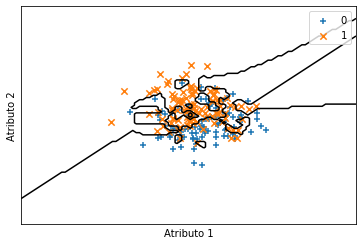

In [10]:
from src import figures

plt.scatter(X[y == 0,0], X[y == 0,1], s=40, label="0", marker="+")
plt.scatter(X[y == 1,0], X[y == 1,1], s=40, label="1", marker="x")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.legend()

figures.plot_2d_separator(clf, X)

plt.show()

In [11]:
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.56

### Ejercicio: Selección k
Aumenta el número de vecinos del KNN (p.ej hasta 30) y describe como se comporta el algoritmo

In [15]:
def knn(k=1):
    
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    print("Accuracy Train:", clf.score(X_train, y_train),
          "Accuracy Test:", clf.score(X_test, y_test))
    
    plt.scatter(X[y == 0,0], X[y == 0,1], s=40, label="0", marker="+")
    plt.scatter(X[y == 1,0], X[y == 1,1], s=40, label="1", marker="x")
    plt.xlabel("Atributo 1")
    plt.ylabel("Atributo 2")
    plt.legend()

    figures.plot_2d_separator(clf, X)

    plt.show()

Accuracy Train: 1.0 Accuracy Test: 0.56


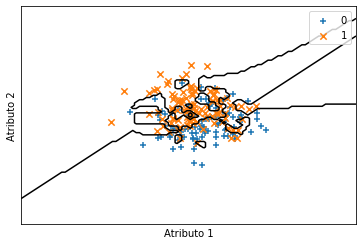

In [16]:
knn()

n = 5

Accuracy Train: 0.74 Accuracy Test: 0.72


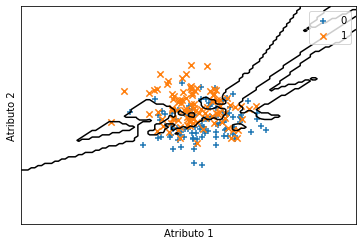

In [17]:
knn(5)

n = 15

Accuracy Train: 0.6933333333333334 Accuracy Test: 0.68


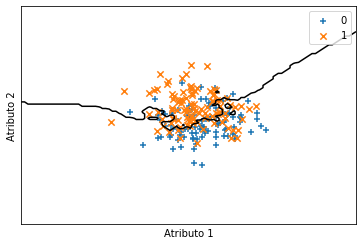

In [18]:
knn(15)

n = 30

Accuracy Train: 0.6666666666666666 Accuracy Test: 0.74


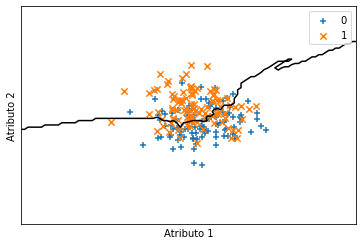

In [19]:
knn(30)

### Elegir el mejor k


El valor de K en kNN corresponde con el número de instancias a tener en cuenta a la hora de determinar la afinidad con las clases.

Este método supone que los vecinos más cercanos (k) nos dan la mejor clasificación y esto se hace utilizando todos los atributos; el problema de dicha suposición es que es posible que se tengan muchos atributos irrelevantes que dominen sobre la clasificación: dos atributos relevantes perderían peso entre otros veinte irrelevantes.

Vamos a intentar determinar el número óptimo de vecinos para el iris dataset, en el que tenemos 3 clases.

In [20]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [29]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Vemos que tenemos 4 variables (iris.feature_names) con las que hacer la clasificación.

In [30]:
X.shape

(150, 2)

In [31]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
np.unique(y)

array([0, 1, 2])

Sin embargo, para nuestro ejemplo nos vamos a quedar tan solo con las 2 primeras. De este modo podemos hacer una respresentación gráfica y comprobar las diferencias al seleccionar varios valores de k.

In [33]:
X = X[:, :2]

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [36]:
X_std.mean(axis=0), X_std.std(axis=0)

(array([-1.69031455e-15, -1.84297022e-15]), array([1., 1.]))

In [37]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_std, y)

KNeighborsClassifier(n_neighbors=20)

/home/bigdatafutura/Sesion 03/src/figures.py:72: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


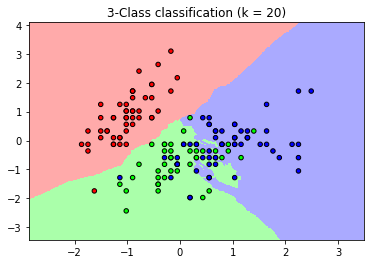

In [39]:
figures.plot_3d_separator(clf, X_std, y)

Para evitar este proceso de probar varios k's hasta dar con el adecuado, y que en este caso podemos hacer de forma gráfica al tener sólo 2 dimensiones, usamos el método GridSearchCV que nos ofrece scikit-learn y permite hacer una búsqueda a través de varias opciones.

In [40]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of t

In [41]:
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
params = {"n_neighbors": range(1, 21),
         "p" : range(1,3)}

clf_gs = GridSearchCV(clf, params, cv=5)
clf_gs.fit(X_std, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21), 'p': range(1, 3)})

In [31]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either e

In [32]:
clf_gs.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 15,
 'p': 1,
 'weights': 'uniform'}

In [33]:
clf_gs.grid_scores_

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [ ]:
figures.plot_3d_separator(clf_gs.best_estimator_, X_std, y)

## kNN: Regresión

En algoritmo KNN se puede usar tanto para clasificación como para regresión y se encuentra implementado en scikit-learn, importándolo del siguiente modo:

In [34]:
from sklearn.neighbors import KNeighborsRegressor

Del mismo modo que cualquier modelo de regresión, tenemos la métrica *mean_squared_error* (mejor cuanto más pequeño sea el valor) con el que evaluar el modelo, y que se puede usar mediante este código:

In [35]:
from sklearn.metrics import mean_absolute_error

Ejemplo: `mean_squared_error(y_real, y_pred)`

Dados los datos generados en la celda inferior X e y:

In [36]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(100,1), axis=0)
y = np.sin(X)[:, 0]
y_noise = np.sin(X)[:, 0] + np.random.normal(size=X.shape[0],scale=0.20)

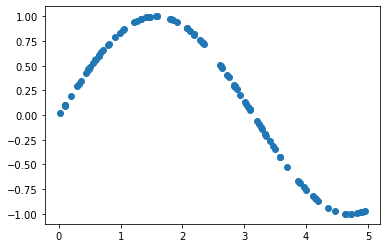

In [37]:
plt.scatter(X, y.ravel())
plt.show()

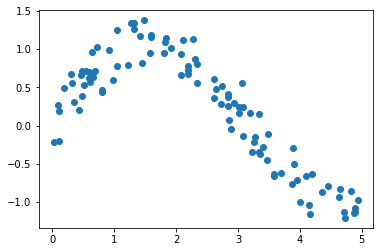

In [38]:
plt.scatter(X, y_noise.ravel())
plt.show()

- a. Determine de forma manual cúal es el número optimo de k's
- b. Encuentre el valor óptimo de k mediante un GridSearchCV

Determine de forma manual cuál es el número optimo de k's:

In [39]:
help(KNeighborsRegressor)

Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedFloatMixin, sklearn.base.RegressorMixin)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : un

In [40]:
clf = KNeighborsRegressor()
params = {"n_neighbors": range(1, 20)}

clf_gs = GridSearchCV(clf, params, cv=3)
clf_gs.fit(X, y_noise)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20)})

Encuentre el valor óptimo de k mediante un GridSearchCV:

In [41]:
clf_gs.best_estimator_

KNeighborsRegressor(n_neighbors=1)

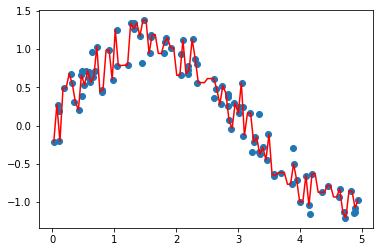

In [42]:
X_axis = np.linspace(X.min(),X.max(), 100).reshape(100, 1)
y_axis_pred = clf_gs.best_estimator_.predict(X_axis)

plt.scatter(X, y_noise.ravel())
plt.plot(X_axis, y_axis_pred, c="red")
plt.show()

In [1]:
import pandas as pd 

dic_movie = { 
    "movie":["Avengers: Endgame", "Avatar", "Titanic", "Star Wars: The Force Awakens", "Avengers: Infinity War"], 
    "collections":[2.796, 2.789, 2.187, 2.068, 2.048],
    "release_yr":[2019, 2009, 1997, 2015, 2018]}

movie_df = pd.DataFrame(dic_movie)
movie_df

,movie,collections,release_yr
0,Avengers: Endgame,2.796,2019
1,Avatar,2.789,2009
2,Titanic,2.187,1997
3,Star Wars: The Force Awakens,2.068,2015
4,Avengers: Infinity War,2.048,2018


In [5]:
movie_df.shape

(5, 3)

In [6]:
mov = {"Avengers: Endgame": 2.796, "Avatar":2.789, "Titanic":2.187} 